In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('house_price_mumbai.csv')

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dtypes

BHK           object
project       object
Location      object
City          object
Total sqft     int64
price_sqft    object
price         object
dtype: object

In [8]:
df['BHK'].unique()

array(['3 BHK Apartment', '2 BHK Apartment', '1 BHK Independent House',
       '1 BHK Apartment', '1 RK Studio Apartment', '1', '4 BHK Apartment',
       'R', '3', '2', '5 BHK Independent Floor',
       '6 BHK Independent Floor', '3 BHK Independent Floor',
       '3 BHK Independent House', '3 BHK Villa', '4',
       '2 BHK Independent Floor', '5', '2 RK Studio Apartment',
       '5 BHK Independent House', '6', '5 BHK Apartment',
       '2 BHK Independent House'], dtype=object)

In [9]:
def fun(x):
    if len(x) != 1:
        s=str(x).split(" ")[0]
        return s
    else:
        return x
    

df['BHK'] = df['BHK'].map(lambda x: fun(x))
# i=df[df['BHK']=='R'].index
df.drop(df[df['BHK']=='R'].index, axis=0,inplace=True)
df['BHK'].unique()

array(['3', '2', '1', '4', '5', '6'], dtype=object)

In [10]:
df.drop(df[df['project'].isnull()].index, axis=0, inplace=True)

In [11]:
df.shape

(2166, 7)

In [12]:
df['Location']=df['Location'].map(lambda x: str(x).strip())
df['Location']=df['Location'].map(lambda x: str(x).title())
df['Location'].unique()

array(['Chembur', 'Kurla', 'Malad West', 'Rasayani', 'Vikhroli', 'Neral',
       'Mahim', 'Fort', 'Dombivali', 'Palghar', 'Malad East', 'Vangani',
       'Jogeshwari West', 'Dahisar', 'Borivali East', 'Mulund West',
       'Kharghar', 'Vasai', 'Santacruz East', 'Ambernath East',
       'Andheri West', 'Mazagaon', 'Karjat', 'Khopoli', 'Goregaon East',
       'Panvel', 'Kalyan West', 'Andheri East', 'Dronagiri', 'Umroli',
       'Virar', 'Kalyan East', 'Thane West', 'Shahapur', 'Taloja', 'Ulwe',
       'Titwala', 'Diva', 'Kamothe', 'Bhiwandi', 'Kandivali West',
       'Powai', 'Badlapur West', 'Mira Road East', 'Vasai East', 'Wada',
       'Sion', 'Badlapur East', 'Santacruz West', 'Nala Sopara',
       'Borivali West', 'Nerul', 'Ghatkopar West', 'Karanjade',
       'Kanjurmarg', 'Anjurdive', 'Navade', 'Airoli', 'Goregaon West',
       'Bandra West', 'Kamathipura', 'Bhayandar West', 'Dadar East',
       'Bhayandar East', 'Sanpada', 'Jogeshwari East', 'Kalwa',
       'Koper Khairane', 'Du

In [13]:
def remove_extra(dt, value):
    extras = ['East','West','Lower','Upper']
    pattern = r"\s+(" + "|".join(extras) + r")$"
    dt[value] = dt[value].str.replace(pattern, "", flags=re.IGNORECASE, regex=True)
    dt[value] = dt[value].str.strip()
    return dt

df = remove_extra(df, 'Location')



In [14]:
df['Location'].unique()

array(['Chembur', 'Kurla', 'Malad', 'Rasayani', 'Vikhroli', 'Neral',
       'Mahim', 'Fort', 'Dombivali', 'Palghar', 'Vangani', 'Jogeshwari',
       'Dahisar', 'Borivali', 'Mulund', 'Kharghar', 'Vasai', 'Santacruz',
       'Ambernath', 'Andheri', 'Mazagaon', 'Karjat', 'Khopoli',
       'Goregaon', 'Panvel', 'Kalyan', 'Dronagiri', 'Umroli', 'Virar',
       'Thane', 'Shahapur', 'Taloja', 'Ulwe', 'Titwala', 'Diva',
       'Kamothe', 'Bhiwandi', 'Kandivali', 'Powai', 'Badlapur',
       'Mira Road', 'Wada', 'Sion', 'Nala Sopara', 'Nerul', 'Ghatkopar',
       'Karanjade', 'Kanjurmarg', 'Anjurdive', 'Navade', 'Airoli',
       'Bandra', 'Kamathipura', 'Bhayandar', 'Dadar', 'Sanpada', 'Kalwa',
       'Koper Khairane', 'Dundare', 'Bhandup', 'Seawoods', 'Sewri',
       'Palava', 'Vasind', 'Wadala', 'Kalamboli', 'Vichumbe', 'Boisar',
       'Napeansea Road', 'Nilje Gaon', 'Prabhadevi', 'Byculla', 'Juhu',
       'Nalasopara', 'Koproli', 'Shil Phata', 'Lower Parel', 'Deonar',
       'Matunga', 'Ulha

In [15]:
df.drop('City', axis=1, inplace=True)
df

,BHK,project,Location,Total sqft,price_sqft,price
0,3,SHREE KRISHNA SangamChembur,Chembur,984,"31,000",3.05 Cr
1,2,Ekdanta 24 KaratKurla,Kurla,598,"23,913",1.42 Cr
2,2,Liberty Bay VueMalad West,Malad,738,"21,000",1.54 Cr
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,"10,676",68.75 L
4,2,Mayfair The ViewVikhroli,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...,...
3974,1,Global Prestige Wing EVasai,Vasai,670,"5,223",35 L
3975,2,Global Prestige Wing EVasai,Vasai,966,"4,968",48 L
3977,1,Navkar Navkar CityNaigaon East,Naigaon,610,"5,573",34 L
3978,1,Navkar City Phase I Part 3Naigaon East,Naigaon,610,"5,245",32 L


In [16]:
df.drop('project', axis=1, inplace=True)
df

,BHK,Location,Total sqft,price_sqft,price
0,3,Chembur,984,"31,000",3.05 Cr
1,2,Kurla,598,"23,913",1.42 Cr
2,2,Malad,738,"21,000",1.54 Cr
3,3,Rasayani,644,"10,676",68.75 L
4,2,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...
3974,1,Vasai,670,"5,223",35 L
3975,2,Vasai,966,"4,968",48 L
3977,1,Naigaon,610,"5,573",34 L
3978,1,Naigaon,610,"5,245",32 L


In [17]:
df = df.reset_index()

In [18]:
df.drop('index', inplace=True, axis=1)

In [19]:
def fun(x):
    if 'Cr' in x or 'cr' in x:
        s = str(x).split(" ")[0]
        s1 = str(int(float(s)*100))
        return s1
    else:
        s=str(x).split(" ")[0]
        return s

In [20]:
df['price']=df['price'].map(lambda x: fun(x))

In [21]:
df['price']

0         305
1         142
2         154
3       68.75
4         145
        ...  
2161       35
2162       48
2163       34
2164       32
2165       36
Name: price, Length: 2166, dtype: object

In [22]:
df['price_sqft']=df['price_sqft'].map(lambda x: str(x).strip())

In [23]:
def fun1(x):
    if "," in str(x):
        s=''.join(str(x).split(","))
        return s
    else:
        return x
    
df['price_sqft']=df['price_sqft'].map(lambda x: fun1(x))

In [24]:
df['price_sqft']

0       31000
1       23913
2       21000
3       10676
4       24914
        ...  
2161     5223
2162     4968
2163     5573
2164     5245
2165     6101
Name: price_sqft, Length: 2166, dtype: object

In [25]:
df

,BHK,Location,Total sqft,price_sqft,price
0,3,Chembur,984,31000,305
1,2,Kurla,598,23913,142
2,2,Malad,738,21000,154
3,3,Rasayani,644,10676,68.75
4,2,Vikhroli,582,24914,145
...,...,...,...,...,...
2161,1,Vasai,670,5223,35
2162,2,Vasai,966,4968,48
2163,1,Naigaon,610,5573,34
2164,1,Naigaon,610,5245,32


In [26]:
df['BHK']=df['BHK'].astype('int')
df['Total sqft']=df['Total sqft'].astype('int')
df['price_sqft']=df['price_sqft'].astype('int')
df['price']=df['price'].astype('float')

In [27]:
df.dtypes

BHK             int64
Location       object
Total sqft      int64
price_sqft      int64
price         float64
dtype: object

In [28]:
df['Location'].value_counts()

Location
Mira Road        195
Dombivali        166
Virar            144
Thane            121
Malad            117
                ... 
Vikroli            1
Girgaon            1
Ville Parle        1
Usarghar Gaon      1
Kasheli            1
Name: count, Length: 100, dtype: int64

In [29]:
df['Location'].value_counts()[df['Location'].value_counts()>4]

Location
Mira Road    195
Dombivali    166
Virar        144
Thane        121
Malad        117
            ... 
Khopoli        5
Dronagiri      5
Kalamboli      5
Palava         5
Saphale        5
Name: count, Length: 62, dtype: int64

In [30]:
df['Location'].value_counts()[:60]

Location
Mira Road               195
Dombivali               166
Virar                   144
Thane                   121
Malad                   117
Naigaon                  89
Kandivali                81
Kharghar                 73
Mulund                   54
Bhandup                  51
Panvel                   50
Karjat                   49
Borivali                 49
Vasai                    48
Andheri                  47
Badlapur                 43
Chembur                  42
Airoli                   41
Kalyan                   40
Dahisar                  36
Powai                    31
Goregaon                 26
Jogeshwari               26
Palghar                  25
Koper Khairane           23
Kurla                    21
Taloja                   20
Byculla                  19
Rasayani                 19
Nala Sopara              18
Santacruz                17
Sion                     17
Ghatkopar                16
Vikhroli                 16
Ghansoli                 16
Bandra     

In [31]:
df

,BHK,Location,Total sqft,price_sqft,price
0,3,Chembur,984,31000,305.00
1,2,Kurla,598,23913,142.00
2,2,Malad,738,21000,154.00
3,3,Rasayani,644,10676,68.75
4,2,Vikhroli,582,24914,145.00
...,...,...,...,...,...
2161,1,Vasai,670,5223,35.00
2162,2,Vasai,966,4968,48.00
2163,1,Naigaon,610,5573,34.00
2164,1,Naigaon,610,5245,32.00


In [32]:
df_groups = df.groupby(['Location'])['price_sqft'].mean()

In [33]:
df_groups

Location
Agripada       29618.000000
Airoli         13846.146341
Ambernath       4503.733333
Andheri        20946.872340
Anjurdive       9819.000000
                   ...     
Ville Parle    33000.000000
Virar           6932.145833
Wada            5818.000000
Wadala         28595.428571
Worli          41036.666667
Name: price_sqft, Length: 100, dtype: float64

In [34]:
df.groupby("Location")['price'].mean().sort_values(ascending=False)

Location
Juhu              1900.000000
Prabhadevi         937.500000
Napeansea Road     783.333333
Worli              633.000000
Khar               586.666667
                     ...     
Palghar             22.118800
Karjat              21.621837
Neral               19.360000
Dundare             18.620000
Umroli              17.916667
Name: price, Length: 100, dtype: float64

In [35]:
df_groups = df.groupby(['Location', 'BHK', 'Total sqft'])['price'].mean()

In [36]:
df_groups

Location  BHK  Total sqft
Agripada  1    545           170.0
               680           340.0
          2    825           140.0
               1270          350.0
               1650          345.0
                             ...  
Wadala    3    1811          380.0
               2740          490.0
Worli     2    1250          400.0
          3    1500          699.0
               1800          800.0
Name: price, Length: 1646, dtype: float64

In [37]:
lc1=[]
bhk2=[]
total_sq_ft=[]
price=list(df_groups.values)

for i in df_groups.index:
    lc1.append([i][0][0])
    bhk2.append([i][0][1])
    total_sq_ft.append([i][0][2])

In [38]:
lc1

['Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Agripada',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Airoli',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Ambernath',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'Andheri',
 'A

In [39]:
bhk2

[1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [40]:
total_sq_ft

[545,
 680,
 825,
 1270,
 1650,
 1350,
 1716,
 2062,
 3646,
 3500,
 525,
 530,
 550,
 555,
 580,
 600,
 620,
 650,
 660,
 670,
 1050,
 700,
 719,
 900,
 950,
 980,
 1000,
 1050,
 1100,
 1150,
 1200,
 1250,
 1100,
 1500,
 1900,
 438,
 600,
 657,
 665,
 675,
 784,
 788,
 662,
 900,
 960,
 995,
 1000,
 1380,
 821,
 216,
 230,
 237,
 246,
 275,
 323,
 350,
 424,
 443,
 446,
 503,
 514,
 534,
 540,
 614,
 650,
 651,
 800,
 421,
 650,
 655,
 659,
 675,
 708,
 715,
 750,
 759,
 800,
 975,
 980,
 1050,
 1200,
 1225,
 1250,
 1292,
 1361,
 947,
 1600,
 1700,
 2016,
 3000,
 1600,
 1601,
 660,
 830,
 294,
 300,
 302,
 304,
 333,
 345,
 350,
 352,
 358,
 360,
 366,
 368,
 372,
 380,
 430,
 502,
 535,
 540,
 545,
 565,
 605,
 610,
 635,
 640,
 695,
 725,
 485,
 499,
 501,
 520,
 557,
 654,
 661,
 683,
 770,
 790,
 865,
 1150,
 1350,
 415,
 530,
 790,
 1000,
 1100,
 1250,
 1300,
 1350,
 1400,
 1500,
 1600,
 795,
 845,
 853,
 854,
 857,
 861,
 965,
 971,
 986,
 1027,
 1034,
 1145,
 1175,
 200,
 302,
 

In [41]:
data=pd.DataFrame()
df_groups.index[0]
data['location']=lc1
data['bhk']=bhk2
data['total_sqft']=total_sq_ft
data['price']=price

In [42]:
data

,location,bhk,total_sqft,price
0,Agripada,1,545,170.0
1,Agripada,1,680,340.0
2,Agripada,2,825,140.0
3,Agripada,2,1270,350.0
4,Agripada,2,1650,345.0
...,...,...,...,...
1641,Wadala,3,1811,380.0
1642,Wadala,3,2740,490.0
1643,Worli,2,1250,400.0
1644,Worli,3,1500,699.0


In [43]:
compos = data[data['bhk']>4].index
data.drop(compos, axis=0, inplace=True)


In [44]:
data.reset_index(inplace=True)

In [45]:
data.drop('index', axis=1, inplace=True)

In [46]:
data

,location,bhk,total_sqft,price
0,Agripada,1,545,170.0
1,Agripada,1,680,340.0
2,Agripada,2,825,140.0
3,Agripada,2,1270,350.0
4,Agripada,2,1650,345.0
...,...,...,...,...
1634,Wadala,3,1811,380.0
1635,Wadala,3,2740,490.0
1636,Worli,2,1250,400.0
1637,Worli,3,1500,699.0


In [47]:
l4=list(df.groupby("Location")['price'].mean().sort_values(ascending=False)[:55].index)

In [48]:
l4

['Juhu',
 'Prabhadevi',
 'Napeansea Road',
 'Worli',
 'Khar',
 'Cuffe Parade',
 'Lower Parel',
 'Bandra',
 'Agripada',
 'Madanpura',
 'Dadar',
 'Matunga',
 'Mazagaon',
 'Santacruz',
 'Bandra Kurla Complex',
 'Peddar Road',
 'Sewri',
 'Wadala',
 'Goregaon',
 'Mazgaon',
 'Powai',
 'Fort',
 'Sion',
 'Lbs Marg',
 'Byculla',
 'Nerul',
 'Ville Parle',
 'Kamathipura',
 'Mahim',
 'Girgaon',
 'Nahur',
 'Mulund',
 'Seawoods',
 'Sector-20 Koparkhairane',
 'Ghatkopar',
 'Jogeshwari',
 'Sanpada',
 'Ghansoli',
 'Borivali',
 'Chembur',
 'Andheri',
 'Malad',
 'Kandivali',
 'Koper Khairane',
 'Kharghar',
 'Kanjurmarg',
 'Thane',
 'Airoli',
 'Kurla',
 'Vikhroli',
 'Dahisar',
 'Bhandup',
 'Bhayandar',
 'Vikroli',
 'Mira Road']

In [49]:
data

,location,bhk,total_sqft,price
0,Agripada,1,545,170.0
1,Agripada,1,680,340.0
2,Agripada,2,825,140.0
3,Agripada,2,1270,350.0
4,Agripada,2,1650,345.0
...,...,...,...,...
1634,Wadala,3,1811,380.0
1635,Wadala,3,2740,490.0
1636,Worli,2,1250,400.0
1637,Worli,3,1500,699.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1639 non-null   object 
 1   bhk         1639 non-null   int64  
 2   total_sqft  1639 non-null   int64  
 3   price       1639 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 51.3+ KB


In [51]:
data.location.value_counts()

location
Dombivali        112
Mira Road        107
Virar             92
Thane             90
Malad             87
                ... 
Usarghar Gaon      1
Ville Parle        1
Vikroli            1
Vichumbe           1
Wada               1
Name: count, Length: 100, dtype: int64

In [52]:
data

,location,bhk,total_sqft,price
0,Agripada,1,545,170.0
1,Agripada,1,680,340.0
2,Agripada,2,825,140.0
3,Agripada,2,1270,350.0
4,Agripada,2,1650,345.0
...,...,...,...,...
1634,Wadala,3,1811,380.0
1635,Wadala,3,2740,490.0
1636,Worli,2,1250,400.0
1637,Worli,3,1500,699.0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1639 non-null   object 
 1   bhk         1639 non-null   int64  
 2   total_sqft  1639 non-null   int64  
 3   price       1639 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 51.3+ KB


In [54]:
data = data.join(pd.get_dummies(data.location))
data = data.drop('location', axis=1)

In [55]:
data

,bhk,total_sqft,price,Agripada,Airoli,Ambernath,Andheri,Anjurdive,Badlapur,Bandra,...,Vasai,Vasind,Vichumbe,Vikhroli,Vikroli,Ville Parle,Virar,Wada,Wadala,Worli
0,1,545,170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,680,340.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,825,140.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1270,350.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1650,345.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,3,1811,380.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1635,3,2740,490.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1636,2,1250,400.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1637,3,1500,699.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [56]:
data.dtypes

bhk              int64
total_sqft       int64
price          float64
Agripada          bool
Airoli            bool
                ...   
Ville Parle       bool
Virar             bool
Wada              bool
Wadala            bool
Worli             bool
Length: 103, dtype: object

<Axes: >

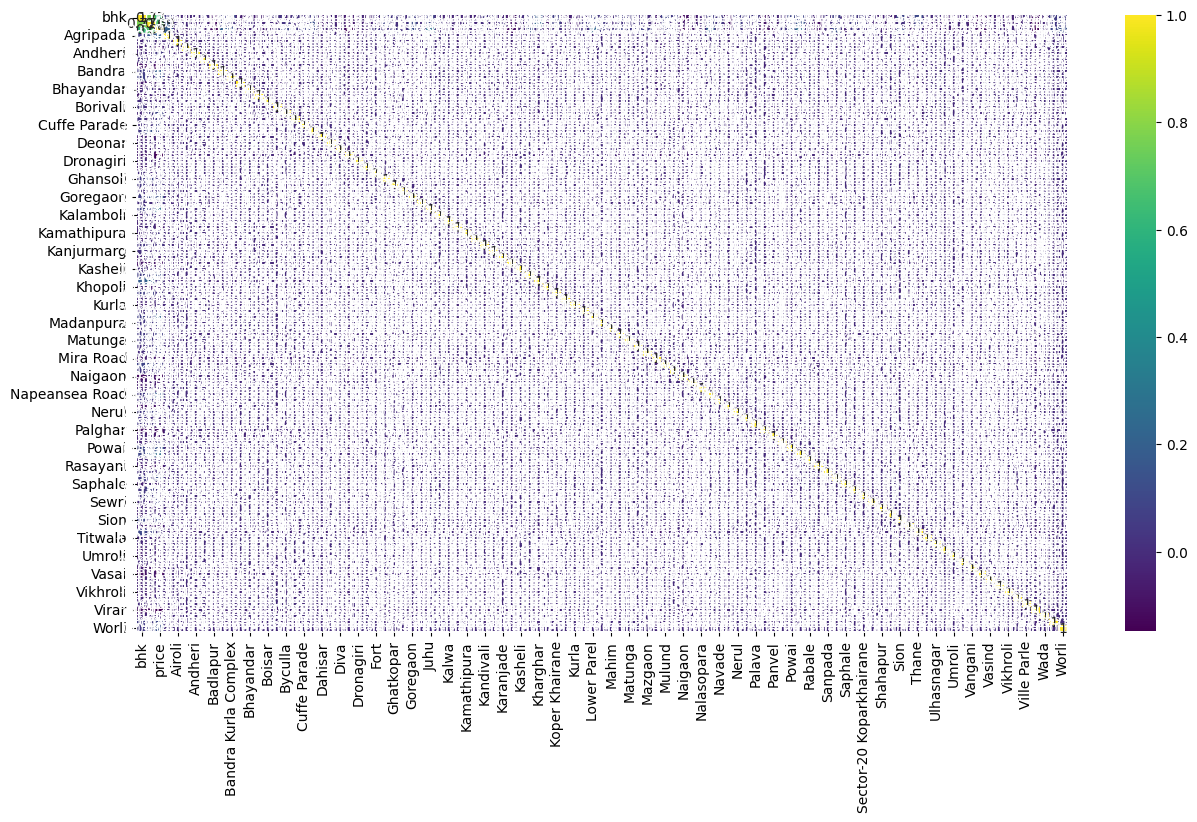

In [57]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="viridis")

In [58]:
target_corr = data.corr()['price'].apply(abs).sort_values(ascending=False)

In [59]:
target_corr

price                      1.000000
total_sqft                 0.687344
bhk                        0.619070
Juhu                       0.286081
Prabhadevi                 0.260488
                             ...   
Sanpada                    0.011208
Sector-20 Koparkhairane    0.008681
Vikroli                    0.007198
Airoli                     0.004173
Kanjurmarg                 0.003996
Name: price, Length: 103, dtype: float64

In [60]:
data

,bhk,total_sqft,price,Agripada,Airoli,Ambernath,Andheri,Anjurdive,Badlapur,Bandra,...,Vasai,Vasind,Vichumbe,Vikhroli,Vikroli,Ville Parle,Virar,Wada,Wadala,Worli
0,1,545,170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,680,340.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,825,140.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1270,350.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1650,345.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,3,1811,380.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1635,3,2740,490.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1636,2,1250,400.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1637,3,1500,699.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X, y = data.drop('price', axis=1), data['price']

In [62]:
X

,bhk,total_sqft,Agripada,Airoli,Ambernath,Andheri,Anjurdive,Badlapur,Bandra,Bandra Kurla Complex,...,Vasai,Vasind,Vichumbe,Vikhroli,Vikroli,Ville Parle,Virar,Wada,Wadala,Worli
0,1,545,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,680,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,825,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1270,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1650,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,3,1811,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1635,3,2740,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1636,2,1250,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1637,3,1500,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [63]:
y

0       170.0
1       340.0
2       140.0
3       350.0
4       345.0
        ...  
1634    380.0
1635    490.0
1636    400.0
1637    699.0
1638    800.0
Name: price, Length: 1639, dtype: float64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
rfr = RandomForestRegressor()

In [66]:
param_gridrfr = {
    "max_depth": [5,10,15,20,25,30,45,50],
    "n_estimators": [2,3,4,5,6,7,8,9,10,11,12]
}

gridrfr = GridSearchCV(rfr, param_grid=param_gridrfr)

In [67]:
gridrfr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 45, 50],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [68]:
gridrfr.best_params_

{'max_depth': 30, 'n_estimators': 7}

In [69]:
gridrfr_pred = gridrfr.predict(X_test)

In [70]:
mean_absolute_error(y_test, gridrfr_pred)

40.52733559676877

In [71]:
gridrfr.score(X_test, y_test)

0.5429519840921635

In [72]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
rfr_pred = rfr.predict(X_test)

In [81]:
rfr_pred

array([249.7406    ,  59.9315    ,  58.64455   , 246.905     ,
        99.7837    , 245.81666667,  33.8194    , 273.34666667,
       147.75      ,  35.22525   ,  18.6447    , 134.20380952,
       162.61541667,  61.27525   , 167.58833333,  92.20476667,
        28.21085   , 106.14      , 451.80833333, 151.83416667,
        37.79513333,  82.6388    ,  69.774     , 133.555     ,
        92.8944    ,  21.4921    , 156.17333333,  36.28155   ,
        30.5024    , 398.3411    ,  32.1826    ,  20.2483    ,
       107.3305    , 198.63166667,  33.01294167,  88.9323    ,
        87.005     ,  35.0738    ,  28.65081667,  36.0332    ,
       292.01      ,  36.923     ,  30.750325  ,  28.1195    ,
       158.87666667,  28.16463333, 147.99      ,  40.52255   ,
       108.51047619, 108.35286667, 126.13      ,  46.3343    ,
       240.02333333,  32.0252    ,  66.0902    ,  33.01213333,
       728.28333333,  40.53045   , 432.61      ,  35.2293    ,
        33.839875  , 158.2       , 125.435     , 264.72

In [97]:
test = [X_test.iloc[1]]

In [98]:
test

[bhk                1
 total_sqft       332
 Agripada       False
 Airoli         False
 Ambernath      False
                ...  
 Ville Parle    False
 Virar          False
 Wada           False
 Wadala         False
 Worli          False
 Name: 315, Length: 102, dtype: object]

In [102]:
pre = rfr.predict(test)

In [103]:
pre[0]

np.float64(59.93149999999997)

In [101]:
y_test.iloc[1]

np.float64(57.09)

In [74]:
mean_absolute_error(y_test, rfr_pred)

36.33706412020906

In [80]:
rfr.score(X_test, y_test)

0.5764255118950457

In [76]:
X.columns

Index(['bhk', 'total_sqft', 'Agripada', 'Airoli', 'Ambernath', 'Andheri',
       'Anjurdive', 'Badlapur', 'Bandra', 'Bandra Kurla Complex',
       ...
       'Vasai', 'Vasind', 'Vichumbe', 'Vikhroli', 'Vikroli', 'Ville Parle',
       'Virar', 'Wada', 'Wadala', 'Worli'],
      dtype='object', length=102)

In [79]:
columns_list = X.columns.tolist()
columns_list

['bhk',
 'total_sqft',
 'Agripada',
 'Airoli',
 'Ambernath',
 'Andheri',
 'Anjurdive',
 'Badlapur',
 'Bandra',
 'Bandra Kurla Complex',
 'Bhandup',
 'Bhayandar',
 'Bhiwandi',
 'Boisar',
 'Borivali',
 'Byculla',
 'Chembur',
 'Cuffe Parade',
 'Dadar',
 'Dahisar',
 'Deonar',
 'Diva',
 'Dombivali',
 'Dronagiri',
 'Dundare',
 'Fort',
 'Ghansoli',
 'Ghatkopar',
 'Girgaon',
 'Goregaon',
 'Jogeshwari',
 'Juhu',
 'Kalamboli',
 'Kalwa',
 'Kalyan',
 'Kamathipura',
 'Kamothe',
 'Kandivali',
 'Kanjurmarg',
 'Karanjade',
 'Karjat',
 'Kasheli',
 'Khar',
 'Kharghar',
 'Khopoli',
 'Koper Khairane',
 'Koproli',
 'Kurla',
 'Lbs Marg',
 'Lower Parel',
 'Madanpura',
 'Mahim',
 'Malad',
 'Matunga',
 'Mazagaon',
 'Mazgaon',
 'Mira Road',
 'Mulund',
 'Nahur',
 'Naigaon',
 'Nala Sopara',
 'Nalasopara',
 'Napeansea Road',
 'Navade',
 'Neral',
 'Nerul',
 'Nilje Gaon',
 'Palava',
 'Palghar',
 'Panvel',
 'Peddar Road',
 'Powai',
 'Prabhadevi',
 'Rabale',
 'Rasayani',
 'Sanpada',
 'Santacruz',
 'Saphale',
 'Seawood